## Data exploration

In [12]:
pwd

'/Users/Nguye061/Documents/GitHub/scikit-learn-mooc'

In [4]:
print(pd. __version__)

2.0.2


In [7]:
adult_census = pd.read_csv("datasets/adult-census.csv")

In [8]:
type(adult_census)

pandas.core.frame.DataFrame

In [9]:
len(adult_census)

48842

In [10]:
adult_census.shape

(48842, 14)

In [11]:
adult_census.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [14]:
adult_census.tail()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [16]:
#Basic desc statistics for all numeric columns
adult_census.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,10.078089,1079.067626,87.502314,40.422382
std,13.710510,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [13]:
#Check data 
adult_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      48842 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  48842 non-null  object
 13  class           48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [15]:
# Examine how often specific values in the target column occur to check for balance:
target_column = "class"
adult_census[target_column].value_counts()

class
 <=50K    37155
 >50K     11687
Name: count, dtype: int64

In [19]:
numerical_columns = [
    "age",
    "education-num",
    "capital-gain",
    "capital-loss",
    "hours-per-week"
]

categorical_columns = [
    "workclass",
    "education",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "native-country"
]
#put brackets around target_column because it is a string, NOT a list, hence it must have [] to make it a list
all_columns = numerical_columns + categorical_columns + [target_column]

adult_census = adult_census[all_columns]

In [20]:
target_column

'class'

In [23]:
print(
    f"The dataset contains {adult_census.shape[0]} samples and "
    f"{adult_census.shape[1]} columns"
)

The dataset contains 48842 samples and 14 columns


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'education-num'}>],
       [<Axes: title={'center': 'capital-gain'}>,
        <Axes: title={'center': 'capital-loss'}>],
       [<Axes: title={'center': 'hours-per-week'}>, <Axes: >]],
      dtype=object)

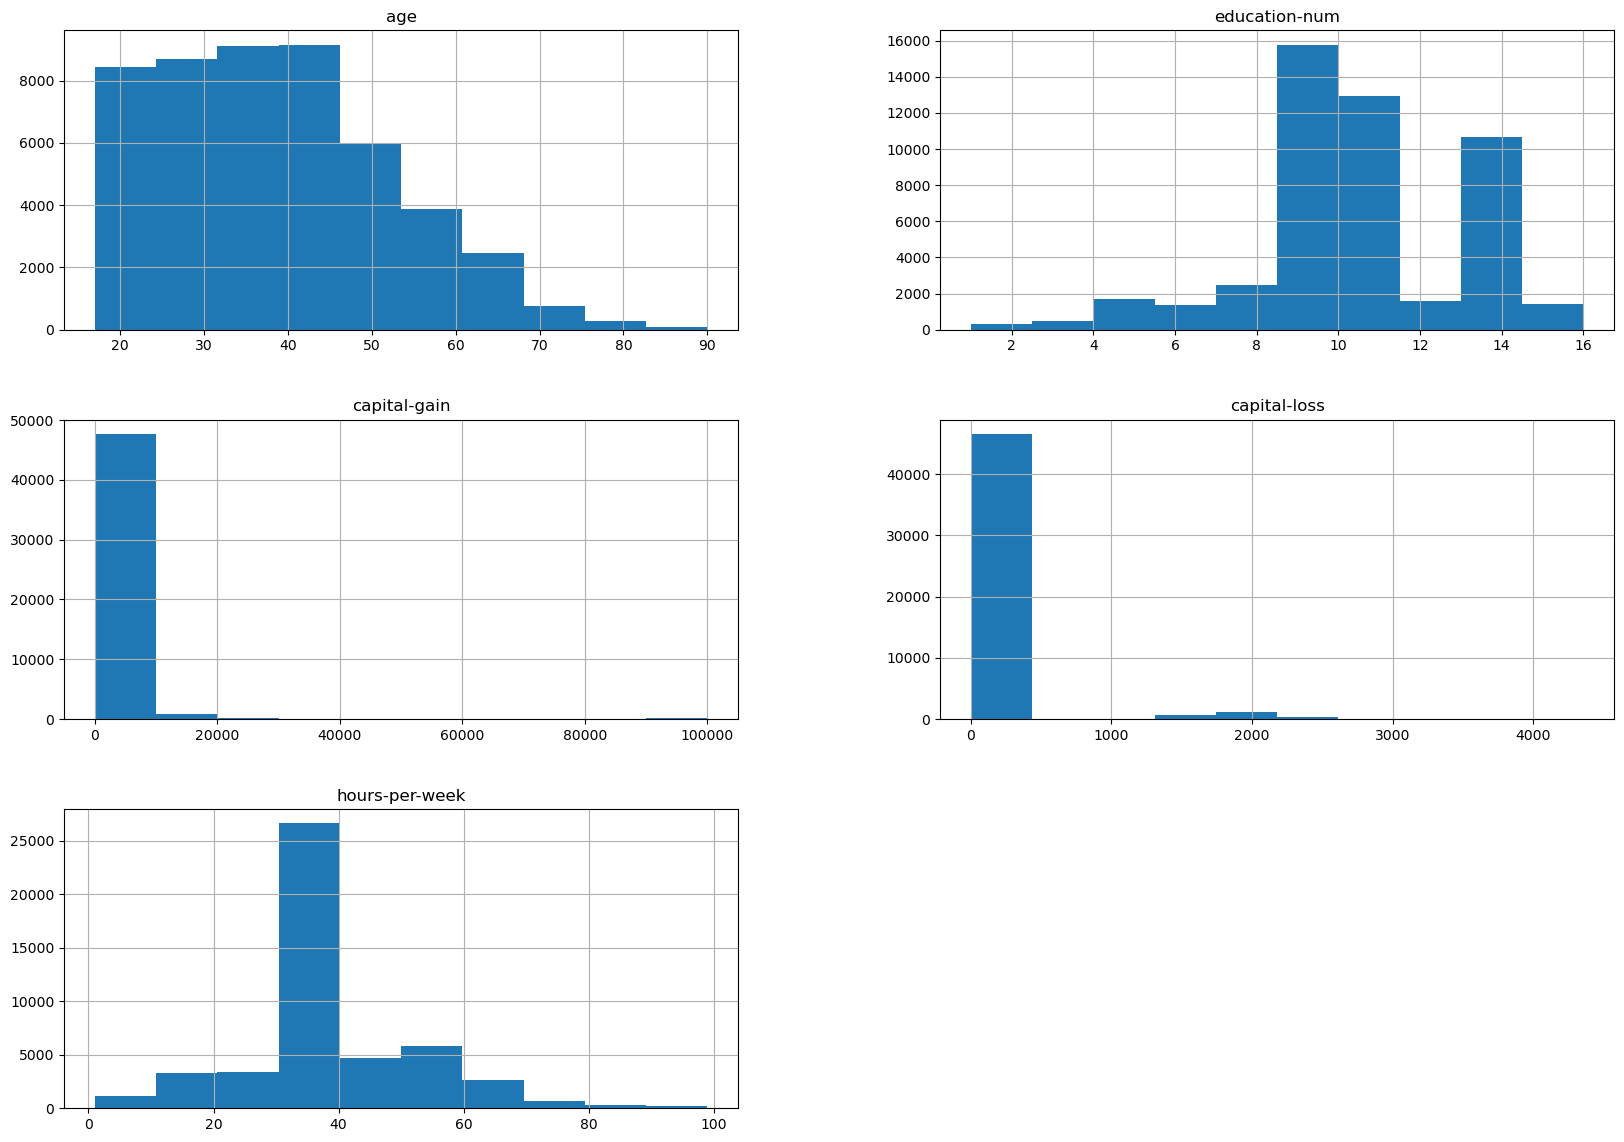

In [25]:
adult_census.hist(figsize=(20,14))

In [27]:
adult_census["sex"].value_counts()

sex
 Male      32650
 Female    16192
Name: count, dtype: int64

Check the numbers in education and education levels. These two columns represent the same information, so we need to get rid of one to avoid skewing the data (collinearity).

In [29]:
pd.crosstab(index=adult_census["education"],columns=adult_census["education-num"]
           )

education-num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
education,,,,,,,,,,,,,,,,
10th,0,0,0,0,0,1389,0,0,0,0,0,0,0,0,0,0
11th,0,0,0,0,0,0,1812,0,0,0,0,0,0,0,0,0
12th,0,0,0,0,0,0,0,657,0,0,0,0,0,0,0,0
1st-4th,0,247,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5th-6th,0,0,509,0,0,0,0,0,0,0,0,0,0,0,0,0
7th-8th,0,0,0,955,0,0,0,0,0,0,0,0,0,0,0,0
9th,0,0,0,0,756,0,0,0,0,0,0,0,0,0,0,0
Assoc-acdm,0,0,0,0,0,0,0,0,0,0,0,1601,0,0,0,0
Assoc-voc,0,0,0,0,0,0,0,0,0,0,2061,0,0,0,0,0


Another option to check is to use pair plots with SEABORN package.

In [30]:
import seaborn as sns

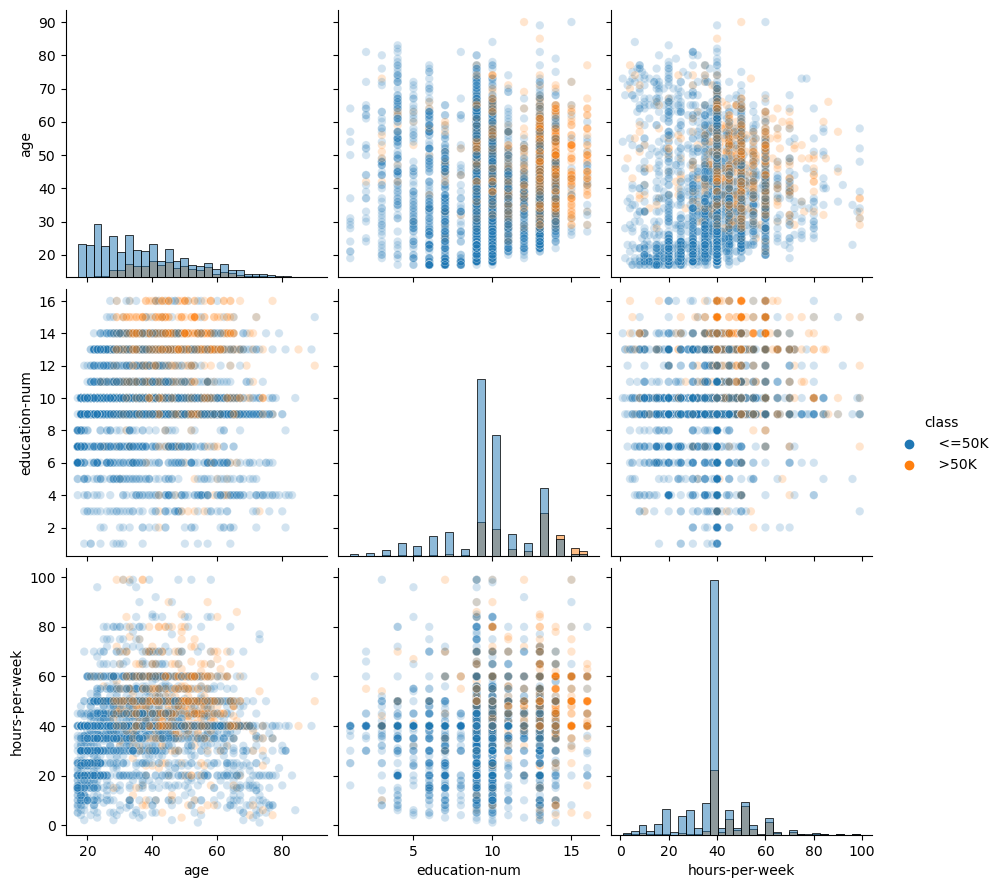

In [37]:
n_samples_to_plot = 5000
columns = ["age", "education-num", "hours-per-week"]
sns.pairplot(
    data = adult_census[:n_samples_to_plot],
    vars = columns,
    hue = target_column,
    plot_kws={"alpha":0.2},
    diag_kind = "hist",
    height = 3,
    diag_kws = {"bins":30}
)   

# DATA CLASSIFICATION: PENGUINS

In [39]:
penguin = pd.read_csv("datasets/penguins_classification.csv")

In [40]:
penguin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Culmen Length (mm)  342 non-null    float64
 1   Culmen Depth (mm)   342 non-null    float64
 2   Species             342 non-null    object 
dtypes: float64(2), object(1)
memory usage: 8.1+ KB


In [41]:
penguin.head()

,Culmen Length (mm),Culmen Depth (mm),Species
0,39.1,18.7,Adelie
1,39.5,17.4,Adelie
2,40.3,18.0,Adelie
3,36.7,19.3,Adelie
4,39.3,20.6,Adelie


In [43]:
penguin["Species"].value_counts()

Species
Adelie       151
Gentoo       123
Chinstrap     68
Name: count, dtype: int64

array([[<Axes: title={'center': 'Culmen Length (mm)'}>,
        <Axes: title={'center': 'Culmen Depth (mm)'}>]], dtype=object)

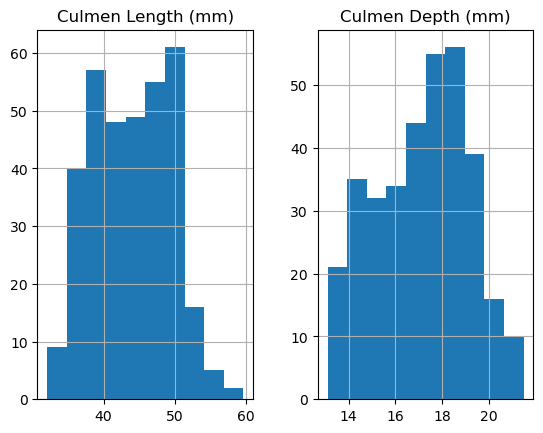

In [44]:
penguin.hist()

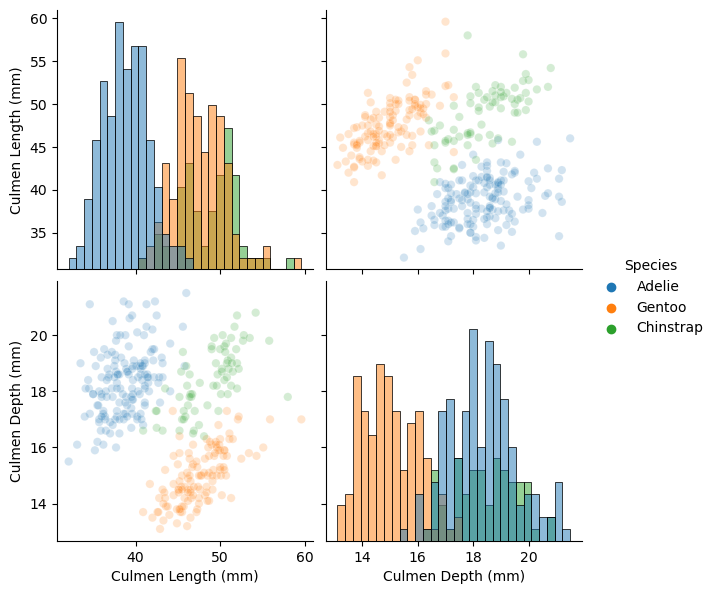

In [45]:
#Plot feature distribution
n_samples_to_plot = 5000
target_column = "Species"
columns = ["Culmen Length (mm)", "Culmen Depth (mm)"]
sns.pairplot(
    data = penguin[:n_samples_to_plot],
    vars = columns,
    hue = target_column,
    plot_kws={"alpha":0.2},
    diag_kind = "hist",
    height = 3,
    diag_kws = {"bins":30}
)  

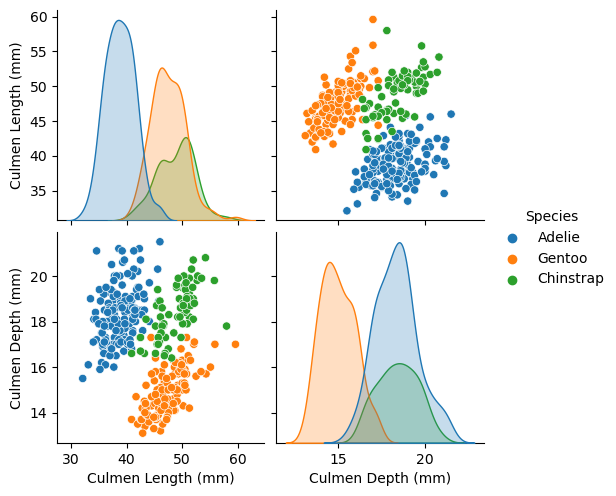

In [48]:
#Another option is this, because there are only 2 numerical columns
sns.pairplot(penguin, hue = "Species")

In [46]:
penguin

,Culmen Length (mm),Culmen Depth (mm),Species
0,39.1,18.7,Adelie
1,39.5,17.4,Adelie
2,40.3,18.0,Adelie
3,36.7,19.3,Adelie
4,39.3,20.6,Adelie
...,...,...,...
337,55.8,19.8,Chinstrap
338,43.5,18.1,Chinstrap
339,49.6,18.2,Chinstrap
340,50.8,19.0,Chinstrap
